In [1]:
from kimport import *
import corona as cr
import gootools as gt

---
$ T_d = T_S \sqrt{\frac{R_S\sqrt{\frac{1-\alpha}{\bar{\epsilon}}}}{2D}}  $ 
is the equation im using for dust temperature (it may or may not be from the wikipedia page for black body radiation).
___

In [4]:
R = np.array([r if (type(r)==float) else r[0] for r in cr.LBVs().radius])*u.R_sun.to(u.AU)
T = 10**np.array([t if (type(t)==float) else t[0] for t in cr.LBVs().logT])
T_dust = lambda d : T*np.sqrt(R/(2*d))
for i,name in enumerate(cr.targets):
    print("Dust temperature at {:.1f}AU away from {}: {:.1f}K".format((d:=cr.pix2au(4*80,cr.LBVs().get_distance(name))),name,T_dust(d)[i]))

Dust temperature at 5889.6AU away from AS-314: 60.9K
Dust temperature at 8245.4AU away from HD-160529: 71.0K
Dust temperature at 5732.5AU away from HD-168607: 81.4K
Dust temperature at 5928.9AU away from HD-168625: 73.4K
Dust temperature at 17904.4AU away from HD-316285: 48.8K
Dust temperature at 4986.5AU away from HD-326823: 69.3K
Dust temperature at 15430.8AU away from MWC-314: 86.2K
Dust temperature at 9894.5AU away from ZETA-SCO: 89.5K


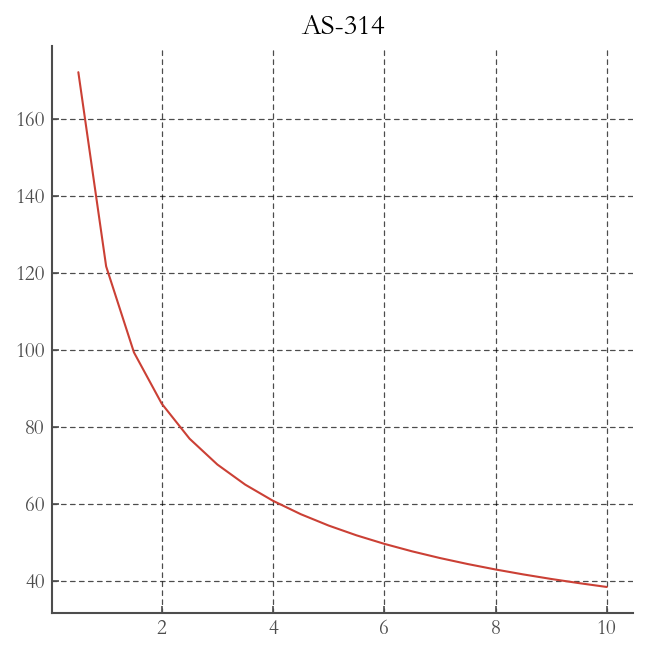

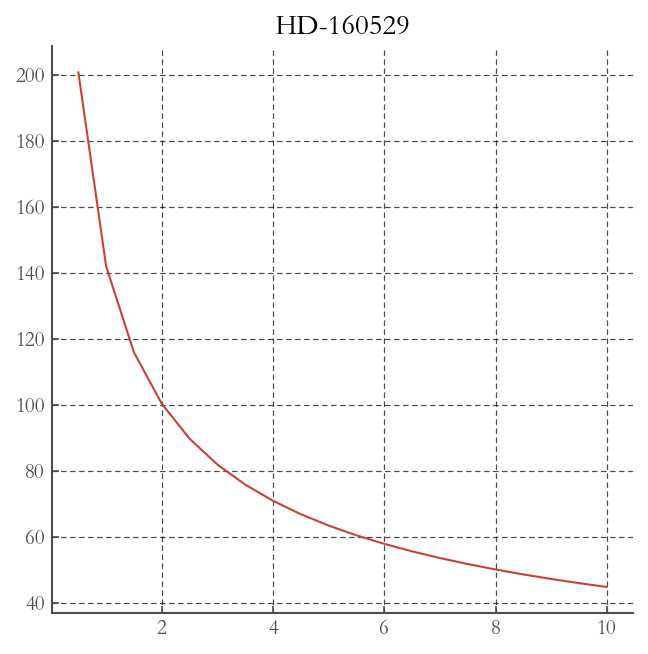

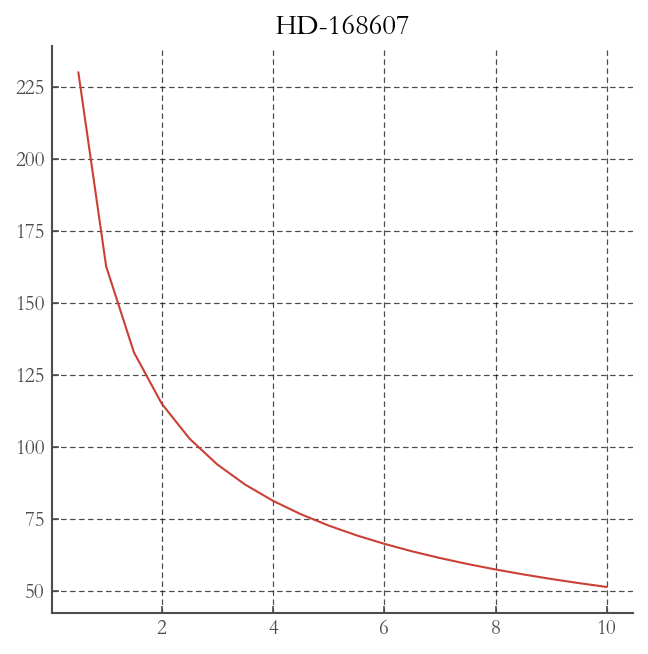

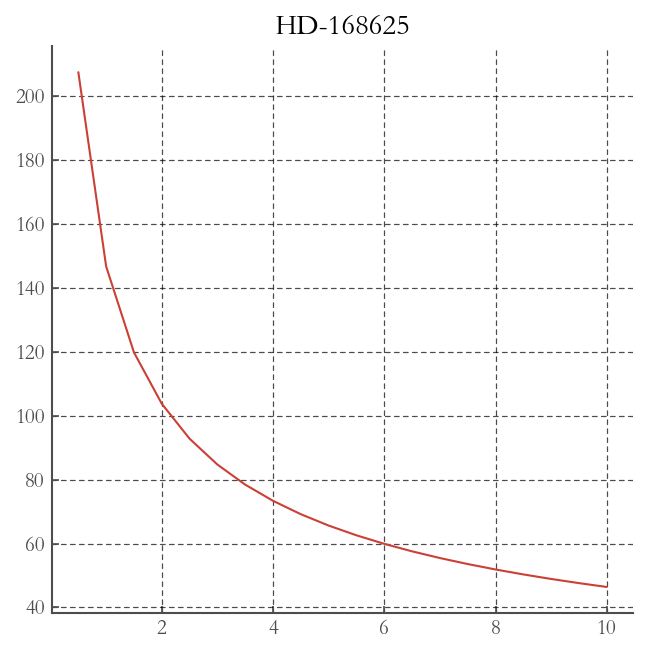

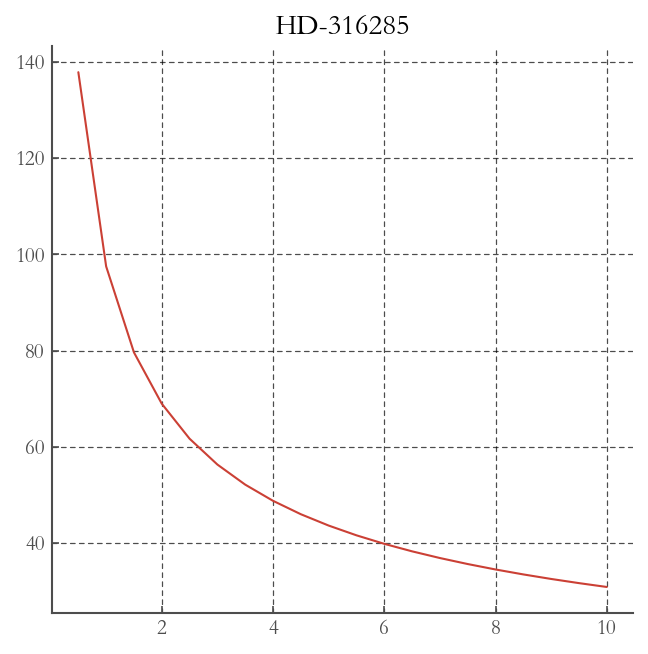

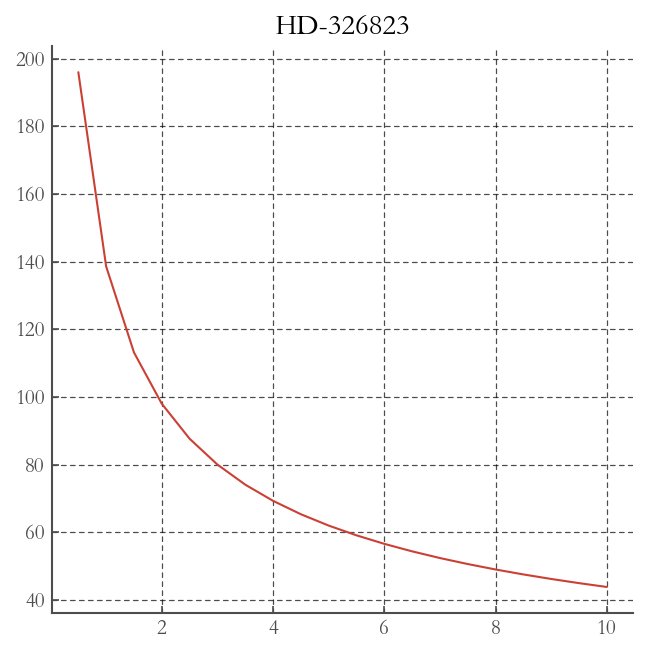

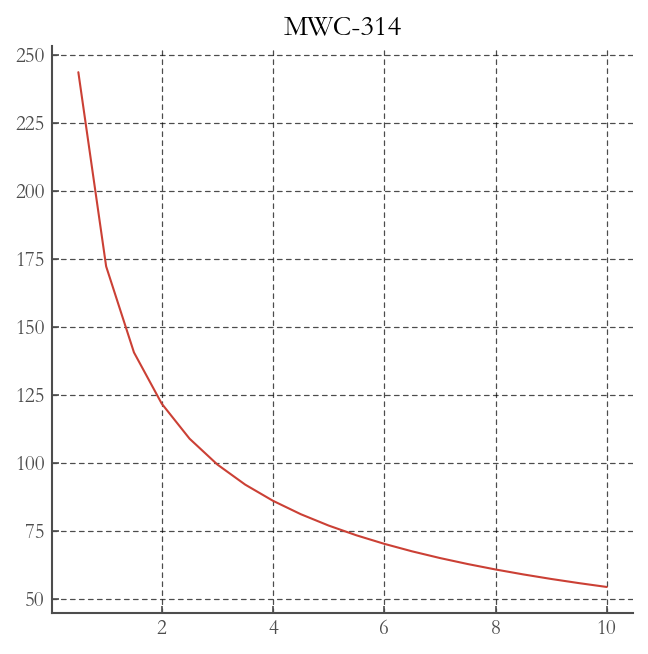

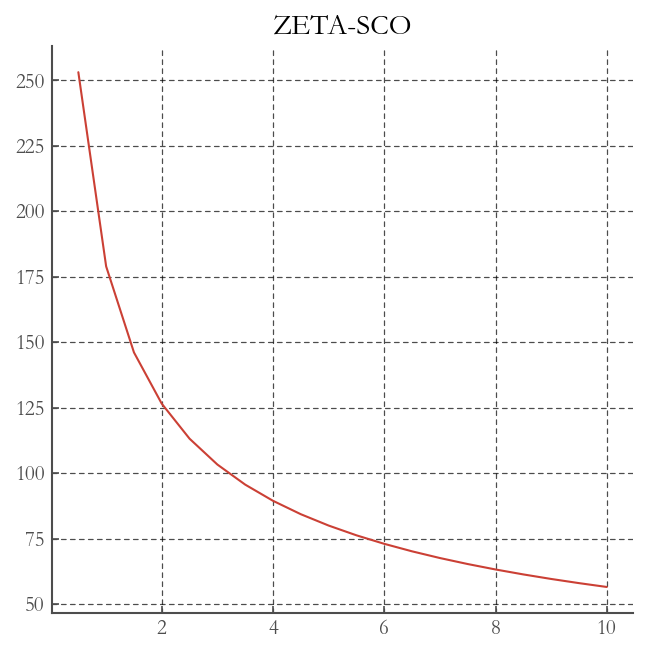

In [7]:
for i,name in enumerate(cr.targets):
    r = (np.arange(20)+1)/2
    t = [T_dust(cr.pix2au(80*d,cr.LBVs().get_distance(name)))[i]    for d in r]
    plt.plot(r,t)
    plt.title(name)
    plt.show()